# Week 8 Networks

### Contents
1. [Import data](#1)
2. [Basic network](#2)
3. [Assigning variables to network](#3)

In [1]:
library(igraph)


Attaching package: ‘igraph’


The following objects are masked from ‘package:stats’:

    decompose, spectrum


The following object is masked from ‘package:base’:

    union




<a name=1></a>
### Import data 
In this tutorial we will build networks using example WGCNA output from a protist community dataset. The WGCNA output format is to provide a nodes file and an edges file. The nodes file lists the node IDs (nodeName), the alternate name (altName) when applicable, and the module or cluster that node belongs to (nodeAttr). In this case the nodes are amplicon sequence variants (ASVs) and the alternate names are their taxonomic ID. The edges file provides a fromNode column and a toNode column that indicates the nodes that have connections. Additionally, the edges file provides a weight column that indicates the strength of the connection and a direction column that indicates if there is directionality to the connection, in this case there is not. The final two columns of the edges file are fromAltName and toAltName which simply provide the taxonomic ID for each of the nodes in the connection. 

Below are import commands for the node and edge files followed by head commands to view the formats of each table.

In [2]:
nodes <- read.table("~/Desktop/TXST/BIO7102.253/nodes.txt", sep = "\t", header = TRUE)
head(nodes)

nodeName                        
1 20c730cbdfa2374f9d306992fd81c0f1
2 de80d8648561886f817a82abdbf5a02c
3 f54b0f9f6cf639fb6cce1f8ad6a729d8
4 333b1c792de79910c694ef103eded767
5 9c9e3c2969d456e406a2c7421b36b83c
6 61d5f97996c7572f2af30d5897b5618b
  altName                                                                                  
1 Alveolata;;;;;;                                                                          
2 Alveolata;Ciliophora;;;;;                                                                
3 Alveolata;Ciliophora;CONThreeP;CONThreeP_X;CONThreeP_XX;Askenasia;Askenasia_sp.          
4 Alveolata;Ciliophora;Phyllopharyngea;Cyrtophoria_7;Hartmannulidae;;                      
5 Alveolata;Ciliophora;Spirotrichea;Euplotia;Uronychiidae;Diophrys;                        
6 Alveolata;Ciliophora;Spirotrichea;Tintinnida;Eutintinnidae;Eutintinnus;Eutintinnus_tenuis
  nodeAttr   
1 red        
2 orange     
3 lightyellow
4 orangered4 
5 orange     
6 greenyellow

In [3]:
edges <- read.table("~/Desktop/TXST/BIO7102.253/edges.txt", sep = "\t", header = TRUE)
head(edges)

fromNode                         toNode                           weight    
1 20c730cbdfa2374f9d306992fd81c0f1 fc5e4ff3e5d7c54e6fb174905bab69d6 0.02827207
2 20c730cbdfa2374f9d306992fd81c0f1 164ea7fd45405558fcfacf47ca577e2c 0.02827207
3 de80d8648561886f817a82abdbf5a02c 9c9e3c2969d456e406a2c7421b36b83c 0.95939349
4 f54b0f9f6cf639fb6cce1f8ad6a729d8 b720764b6a53a33c5ac7477ddbbe3ccf 0.98089442
5 333b1c792de79910c694ef103eded767 4aefe31cbce6b72b1fe43cac526fedfc 0.92396122
6 61d5f97996c7572f2af30d5897b5618b 5471674acb5de95c6bc68980390727e7 0.92702995
  direction 
1 undirected
2 undirected
3 undirected
4 undirected
5 undirected
6 undirected
  fromAltName                                                                              
1 Alveolata;;;;;;                                                                          
2 Alveolata;;;;;;                                                                          
3 Alveolata;Ciliophora;;;;;                                                                
4 Alveolata;Ciliophora;CONThreeP;CONThreeP_X;CONThreeP_XX;Askenasia;Askenasia_sp.          
5 Alveolata;Ciliophora;Phyllopharyngea;Cyrtophoria_7;Hartmannulidae;;                      
6 Alveolata;Ciliophora;Spirotrichea;Tintinnida;Eutintinnidae;Eutintinnus;Eutintinnus_tenuis
  toAltName                                                                                                                                           
1 Rhizaria;Radiolaria;RAD-B;RAD-B_X;RAD-B-Group-II;RAD-B-Group-II_X;RAD-B-Group-II_X_sp.                                                              
2 Stramenopiles;Ochrophyta;Bacillariophyta;Bacillariophyta_X;Raphid-pennate;;                                                                         
3 Alveolata;Ciliophora;Spirotrichea;Euplotia;Uronychiidae;Diophrys;                                                                                   
4 Stramenopiles;Opalozoa;MAST-3;;;;                                                                                                                   
5 Stramenopiles;Ochrophyta;Bacillariophyta;Bacillariophyta_X;Raphid-pennate;;                                                                         
6 Alveolata;Dinoflagellata;Syndiniales;Dino-Group-II;Dino-Group-II-Clade-10-and-11;Dino-Group-II-Clade-10-and-11_X;Dino-Group-II-Clade-10-and-11_X_sp.

In order to construct a network with igraph from a dataframe, your dataframe can only have two columns decribing the nodes that are connected. In this case, those will be the fromNode and toNode columns. Below is a command that will filter the edges table down to just the first two columns.

In [4]:
edges_filtered <- edges[,c(1:2)]
head(edges_filtered)

fromNode                         toNode                          
1 20c730cbdfa2374f9d306992fd81c0f1 fc5e4ff3e5d7c54e6fb174905bab69d6
2 20c730cbdfa2374f9d306992fd81c0f1 164ea7fd45405558fcfacf47ca577e2c
3 de80d8648561886f817a82abdbf5a02c 9c9e3c2969d456e406a2c7421b36b83c
4 f54b0f9f6cf639fb6cce1f8ad6a729d8 b720764b6a53a33c5ac7477ddbbe3ccf
5 333b1c792de79910c694ef103eded767 4aefe31cbce6b72b1fe43cac526fedfc
6 61d5f97996c7572f2af30d5897b5618b 5471674acb5de95c6bc68980390727e7

<a name=2></a>
### Basic network
Now that our data is formatted, we can construct a network using the `graph_from_data_frame()` command. All we have to provide to construct the network is the dataframe and then we can use plot to visualize the network. The network will appear with circles for nodes labelled with the names from the edge file. Connections between nodes are represented by light grey lines between nodes.

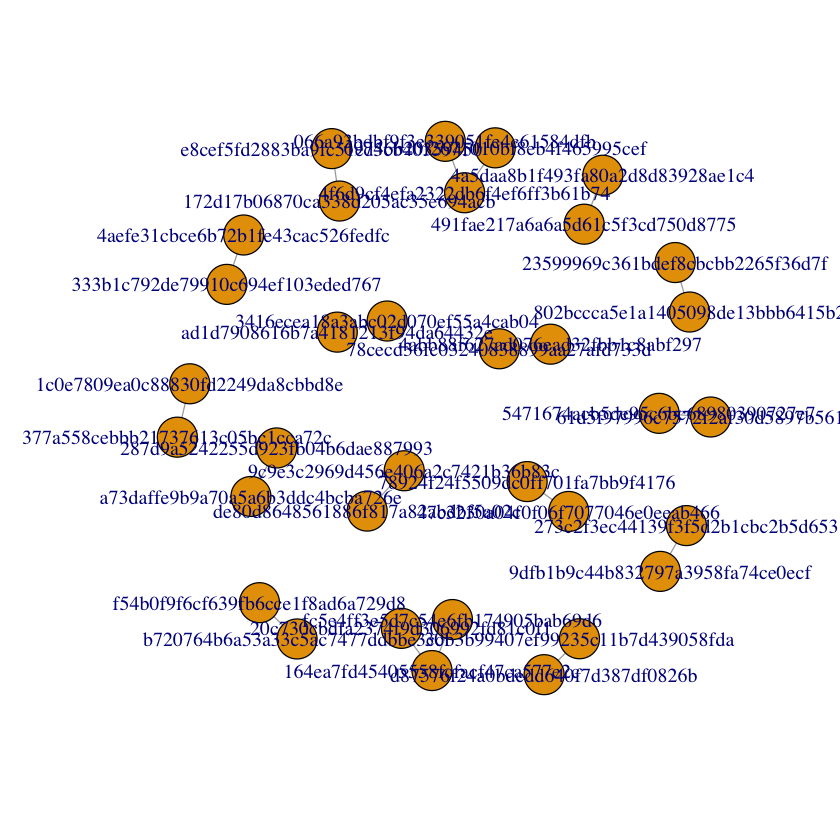

In [5]:
network <- graph_from_data_frame(d = edges_filtered, directed = FALSE)
plot(network)

We can customize the appearance of the network using options within the `plot()` command. To change features of the node we use `vertex.[featureName] =`, to change features of the labels we use `vertex.label.[featureName] =`, and to change features of the edges we use `edge.[featureName] =`. Below are a few examples of how to change each of these compoenents, but this is far from an exhaustive list of options.

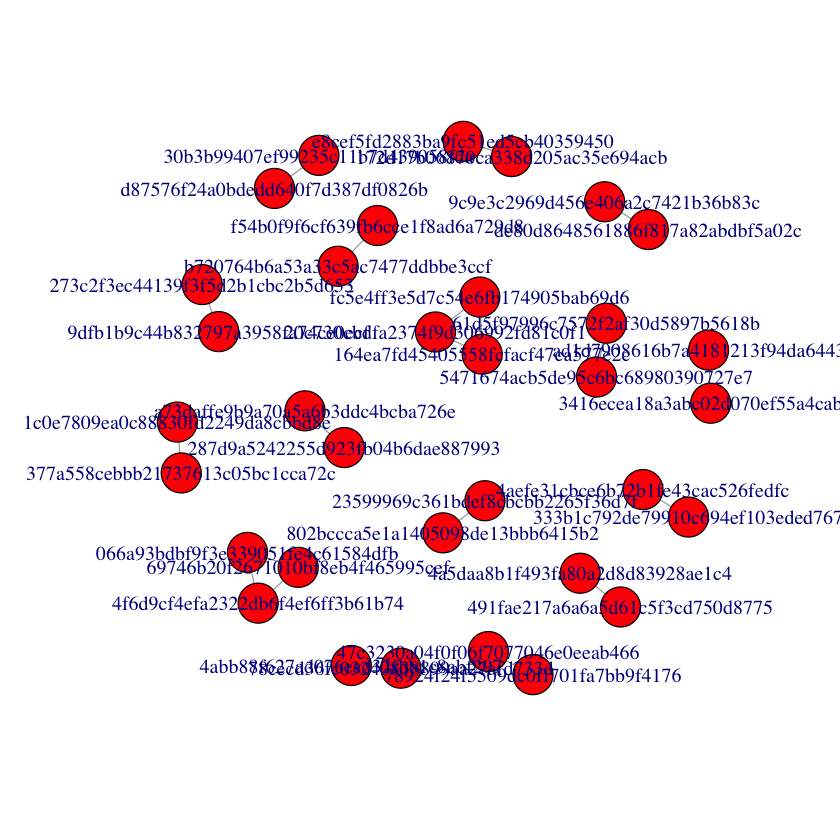

In [6]:
plot(network, vertex.color = "red")

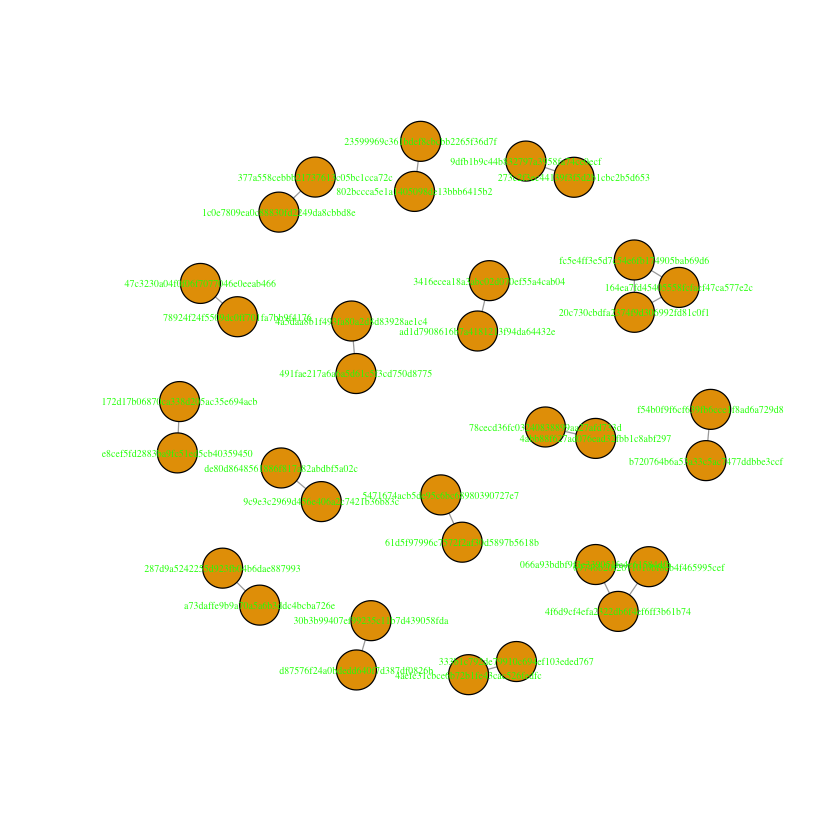

In [7]:
plot(network, vertex.label.cex = 0.5, vertex.label.color = "green")

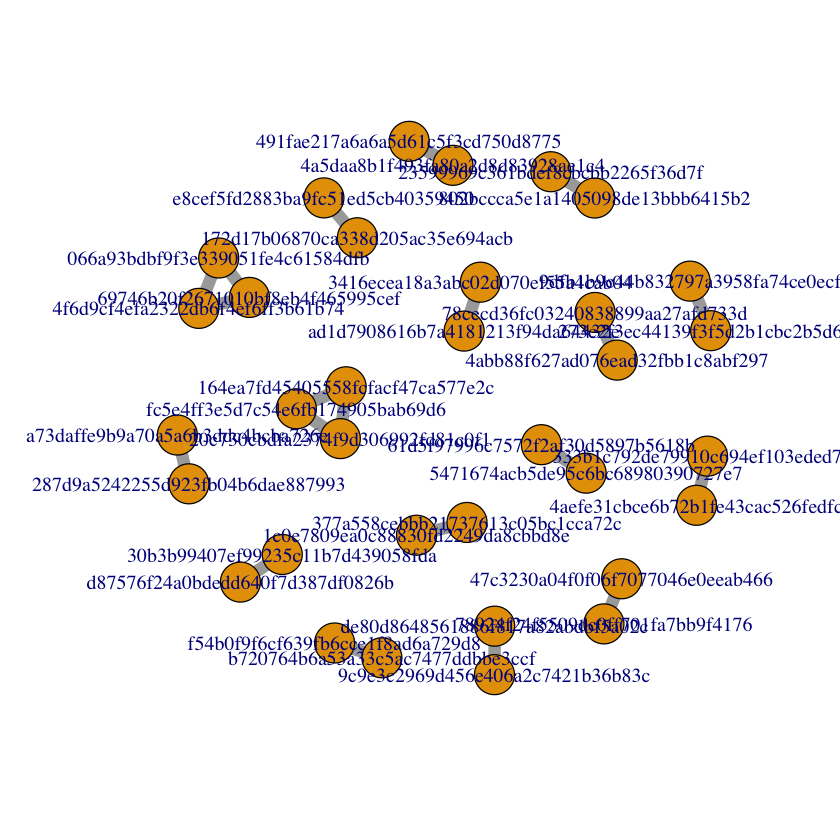

In [8]:
plot(network, edge.width = 10)

In addition to changing individual features of the network we can also change the overall layout of the network. The default layout is the Fruchterman Reingold layout, but the other options include sphere, circle, and random. The best layout for depicting your data will be determined by the dataset you're working with.

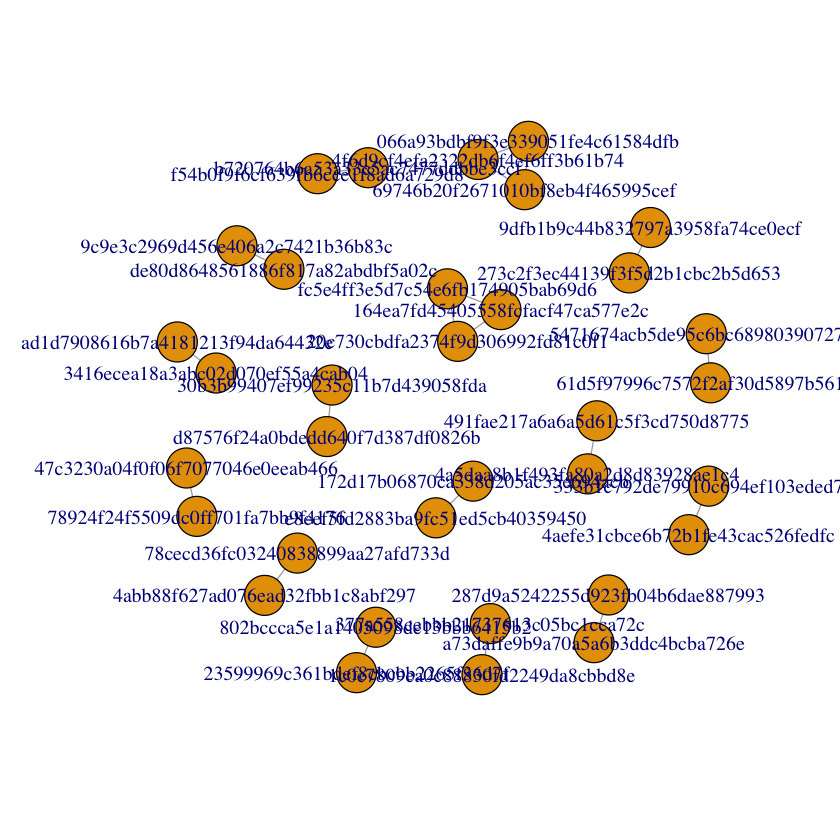

In [9]:
plot(network, layout = layout.fruchterman.reingold)

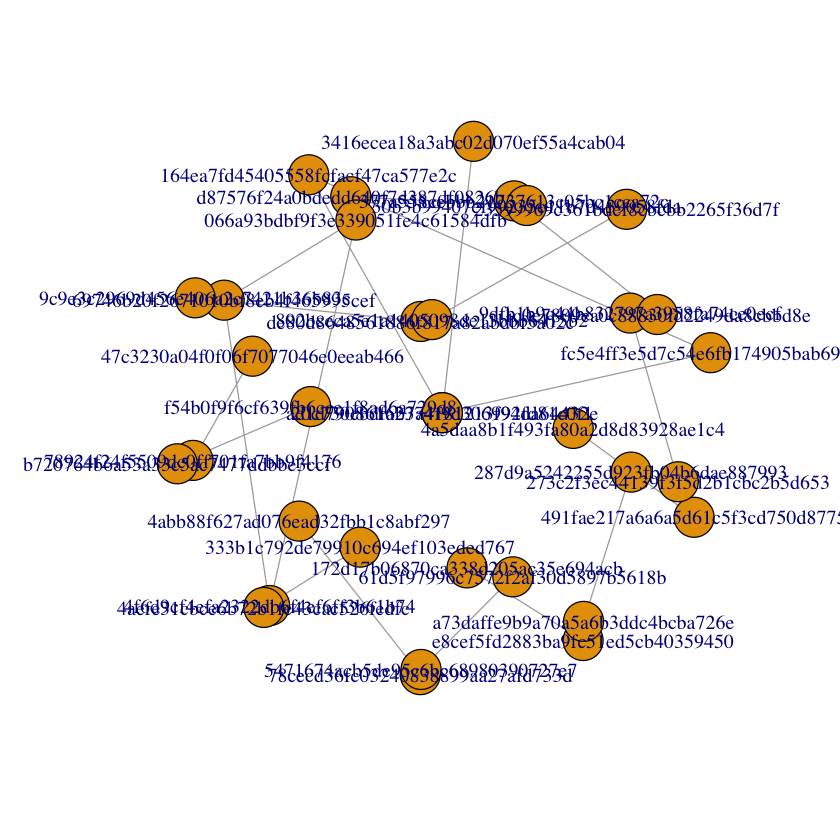

In [10]:
plot(network, layout = layout.sphere)

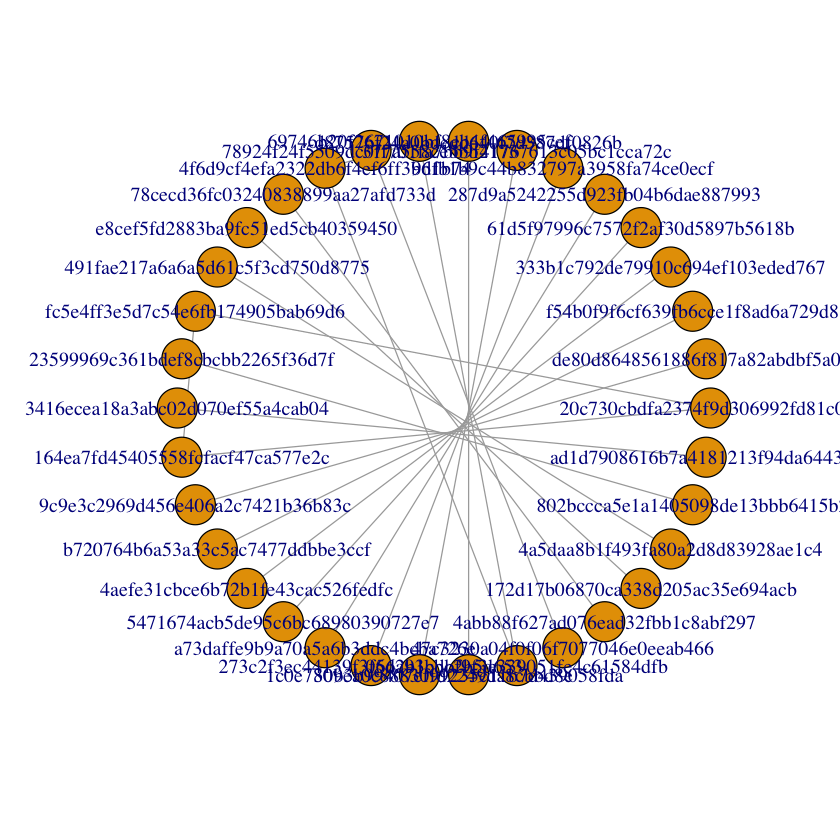

In [11]:
plot(network, layout = layout.circle)

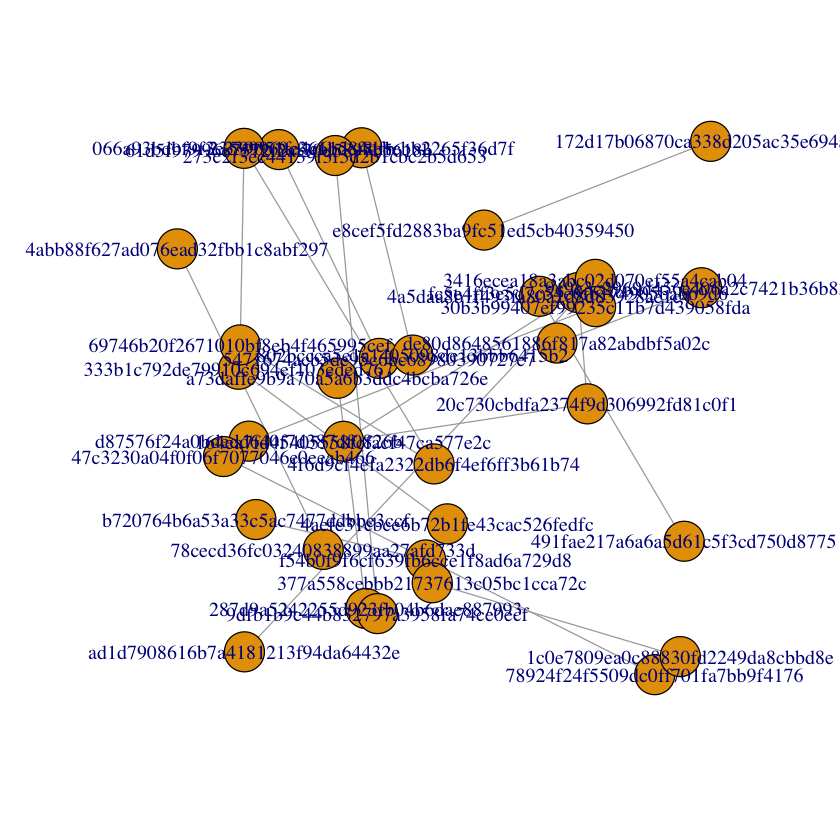

In [12]:
plot(network, layout = layout.random)

<a name=1></a>
### Assigning variables to network
We can also assign variables to the nodes and edges of the network to change its appearance and the information we take away from it. First, we will assign node colors by the modules each node was assigned to in the WGCNA output. This information is in the node file in the nodeAttr column. First, we will rerun the network, this time using both the nodes and the edges file and setting the `directed = ` option to FALSE since these data do not have directionality. 

In [13]:
network <- graph_from_data_frame(d = edges_filtered, vertices = nodes, directed = F)

Next, we build a color vector with the number of unique colors we will need. In this case we need 16 unique colors because we have 16 modules in our output. Because of that we cannot use R Color Brewer since that can only assign up to nine colors. We instead can use I Want Hue to generate a palette for us, and we will copy and paste the hexcodes from the website in the format below.

https://medialab.github.io/iwanthue/

In [14]:
colors <- c("#b05370",
            "#d64053",
            "#be7253",
            "#d35f2b",
            "#c5933f",
            "#b6b836",
            "#96ac5b",
            "#5c722d",
            "#59b54d",
            "#4cb08d",
            "#59a6d9",
            "#6c6db3",
            "#616ddb",
            "#a558c4",
            "#cf8bc9",
            "#d3489a")

Now that we have a color vector, we are going to convert the nodeAttr column of our node file to a numeric factor that we can assign each of these colors to as shown in the code below.

In [15]:
vertexColor <- colors[as.numeric(as.factor(V(network)$nodeAttr))]

Finally, we can plot the network with the `vertex.color =` option set to our new color object from above `vertexColor`. The output should be a plot with each cluster of nodes assigned a unique color.

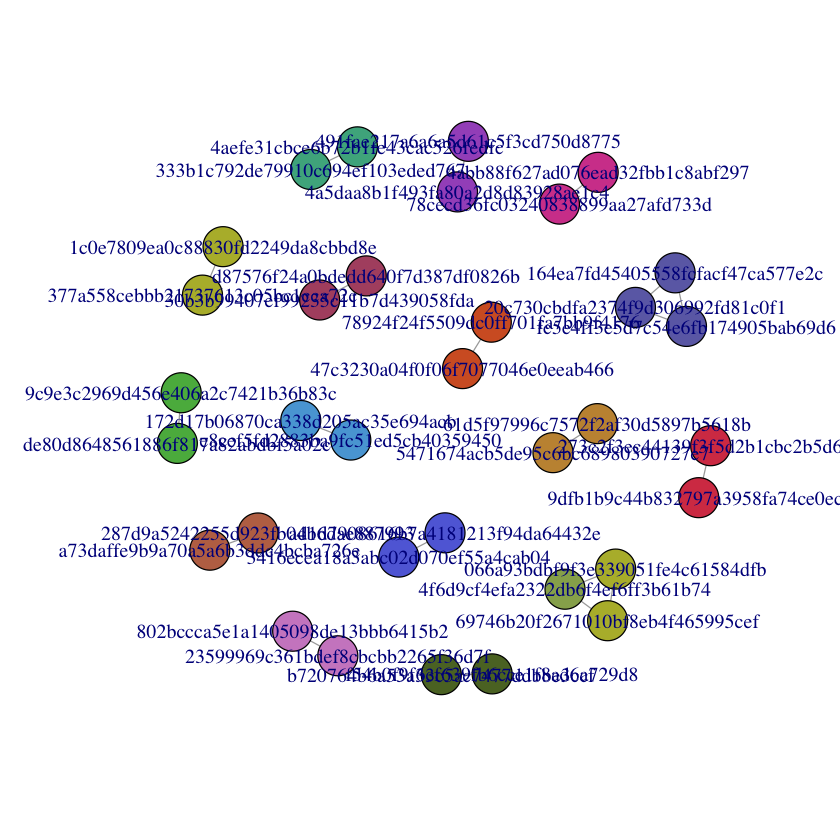

In [16]:
plot(network, vertex.color = vertexColor)

The network feature we will assign a variable to is the edges. This time instead of assigning a color, we will assign the weight column from the edge file to the edge width. This will make stronger connections appear thicker.

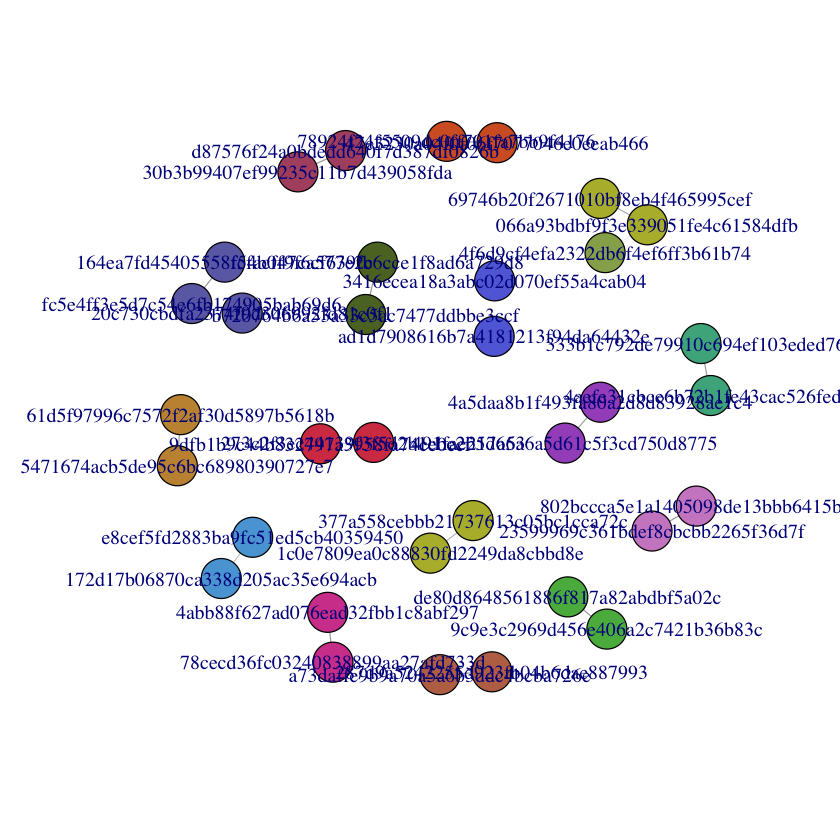

In [17]:
plot(network, vertex.color = vertexColor, 
     edge.width = edges$weight)

You'll notice that there isn't much difference in the edge appearance when plotting that. In this case, that is most likely because our weights are decimal points. To fix this we can apply a multiplication factor to it to scale the edges up and make the differences more visible.

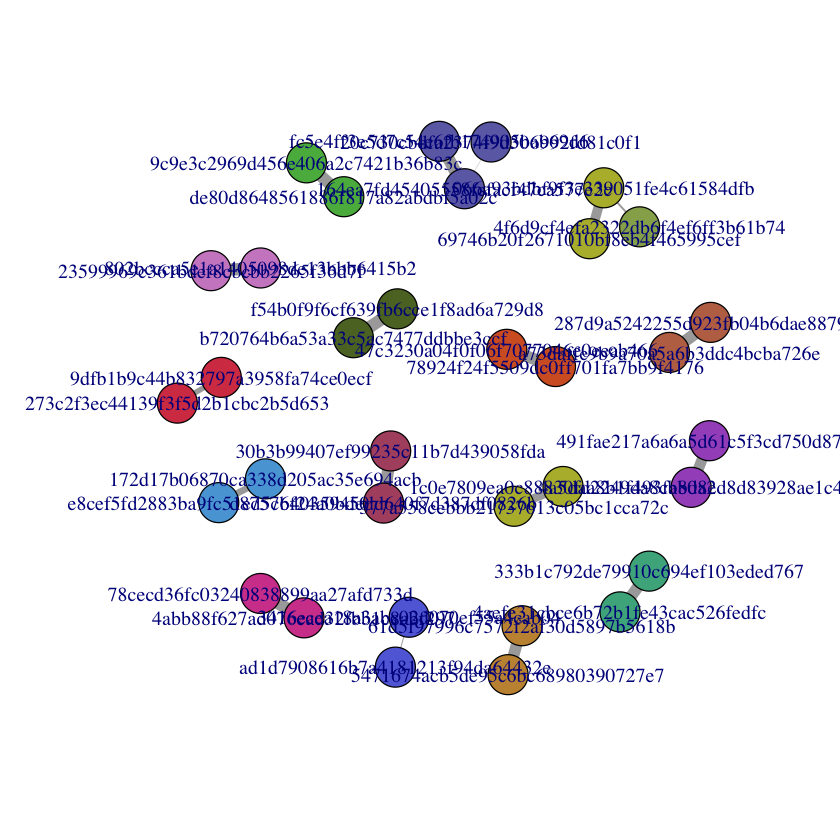

In [18]:
plot(network, vertex.color = vertexColor, 
     edge.width = edges$weight*10)

We can also set the node size to scale by number of connections so the nodes with the most connections appear larger. To do this we have to first set a degree variable and then feed that degree variable into the plot command for vertex size. 

In [19]:
degree <- degree(network, mode = "all")

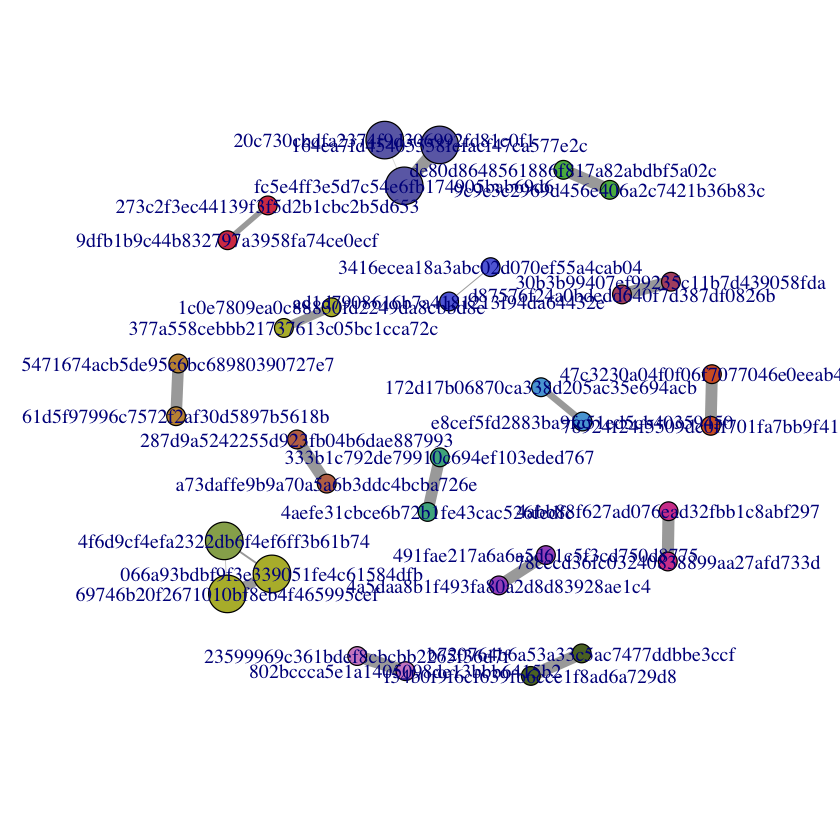

In [20]:
plot(network, vertex.color = vertexColor, edge.width = edges$weight*10, vertex.size = degree*7)

Now we can combine all of these together to tidy up the appearance of our plot.

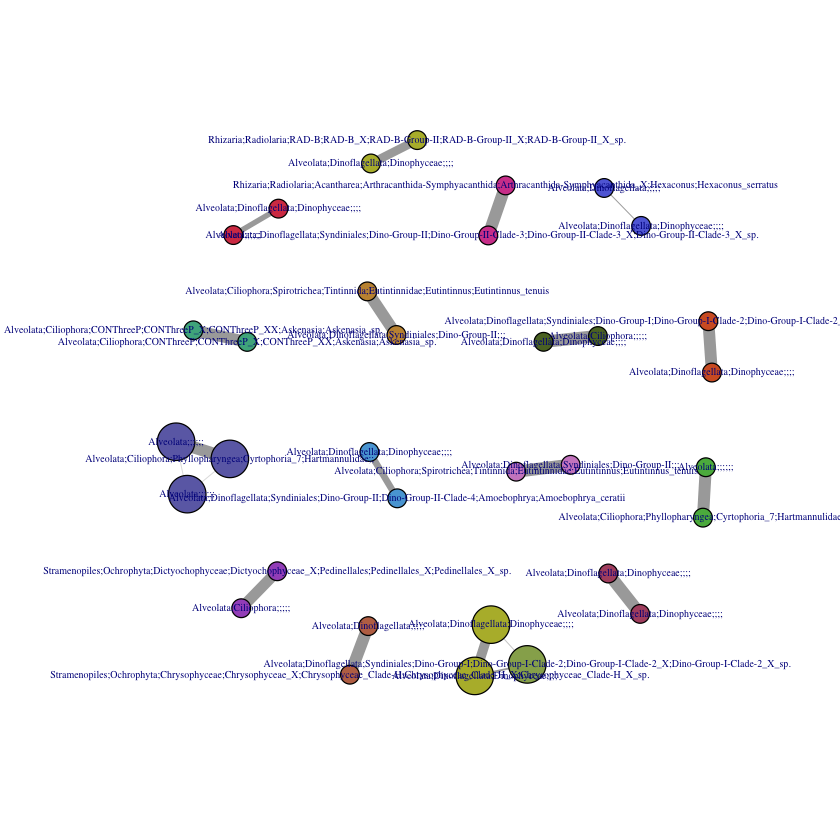

In [21]:
plot(network, vertex.color = vertexColor, edge.width = edges$weight*10, vertex.size = degree*7,
    vertex.label = edges$fromAltName, vertex.label.cex = 0.5)

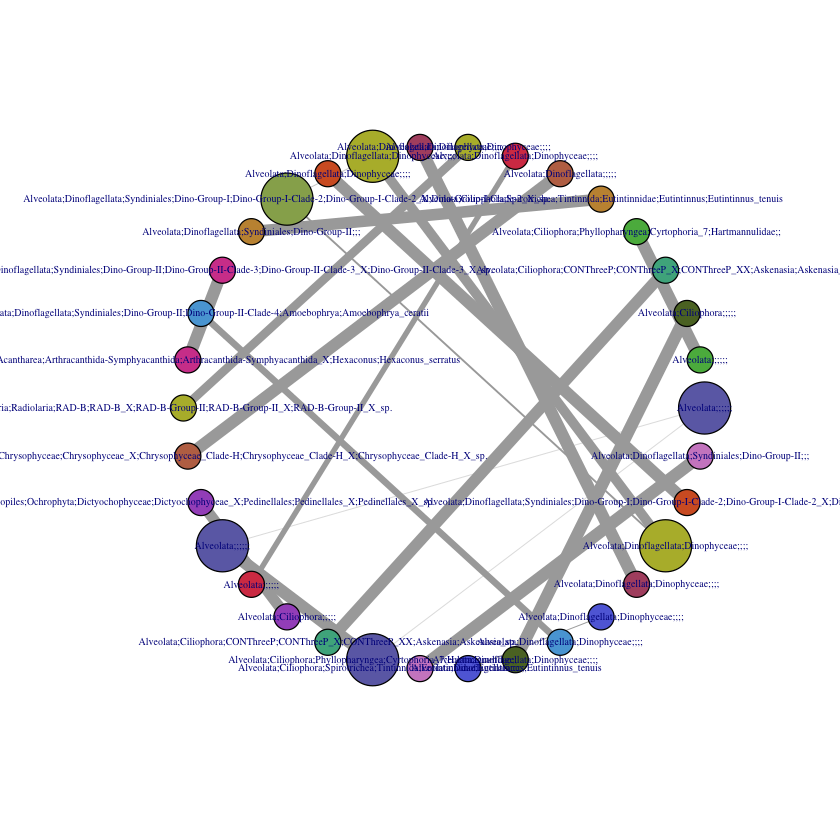

In [22]:
plot(network, vertex.color = vertexColor, edge.width = edges$weight*10, vertex.size = degree*10,
    vertex.label = edges$fromAltName, vertex.label.cex = 0.5, layout = layout.circle)